# Data Visualization with Python
## Peer-graded Assignment: Final Assignment: Part 3 - Submission and Grading


Part 1: Total 10 points

TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year. (1 point)

TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question "Is there a noticeable difference in sales trends between different vehicle types during recession periods?" (1 point)

TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period. (1 point)

TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period. (2 points)

TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales. (1 point)

TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions. (1 point)

TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods. (1 point)

TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period. (1 point)

TASK 1.9:  Develop a line plot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period. (1 point)

Part 2: Total 14 points

TASK 2.1: Create a Dash application and give it a meaningful title. (2 points)

TASK 2.2: Add drop-downs to your dashboard with appropriate titles and options. (1 point)

TASK 2.3: Add a division for output display with appropriate 'id' and 'classname' property. (1 point)

TASK 2.4: Creating Callbacks; Define the callback function to update the input container. (5 points)

TASK 2.5: Create and display graphs for Recession Report Statistics. (3 points)

TASK 2.6: Create and display graphs for Yearly Report Statistics. (2 points)

In [37]:
pip install js

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
# ローカル環境用のデータ読み込み方法
import pandas as pd
import requests
import io

# 方法1: requestsを使用
def load_data_from_url():
    URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
    
    try:
        response = requests.get(URL)
        response.raise_for_status()  # エラーチェック
        df = pd.read_csv(io.StringIO(response.text))
        print('データが正常に読み込まれました！')
        return df
    except requests.RequestException as e:
        print(f"データの読み込みに失敗しました: {e}")
        return None

# 方法2: 直接URLから読み込み
def load_data_direct():
    URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
    
    try:
        df = pd.read_csv(URL)
        print('データが正常に読み込まれました！')
        return df
    except Exception as e:
        print(f"データの読み込みに失敗しました: {e}")
        return None

# データの読み込み
df = load_data_from_url()  # または load_data_direct()

if df is not None:
    print("データの基本情報:")
    print(df.info())
    print("\nデータの統計情報:")
    print(df.describe())
else:
    print("データの読み込みに失敗しました。")

データが正常に読み込まれました！
データの基本情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14 

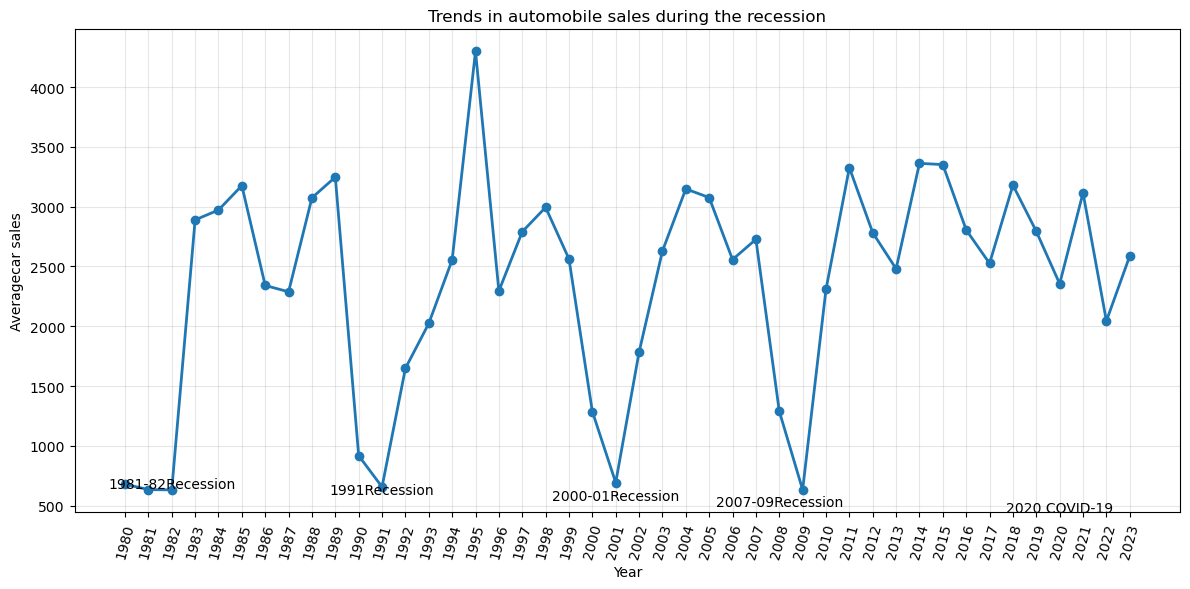

In [39]:
# TASK 1.1: Year別自動車販売の推移を示すラインチャート
plt.figure(figsize=(12, 6))

# Year別のAverage car salesを計算
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

# ラインチャートを作成
df_line.plot(kind='line', linewidth=2, marker='o')

# x軸の設定
plt.xticks(list(range(1980, 2024)), rotation=75)

# ラベルとタイトルの設定
plt.xlabel('Year')
plt.ylabel('Averagecar sales')
plt.title('Trends in automobile sales during the recession')

# Recession Periodの注釈を追加
plt.text(1982, 650, '1981-82Recession', fontsize=10, ha='center')
plt.text(1991, 600, '1991Recession', fontsize=10, ha='center')
plt.text(2001, 550, '2000-01Recession', fontsize=10, ha='center')
plt.text(2008, 500, '2007-09Recession', fontsize=10, ha='center')
plt.text(2020, 450, '2020 COVID-19', fontsize=10, ha='center')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

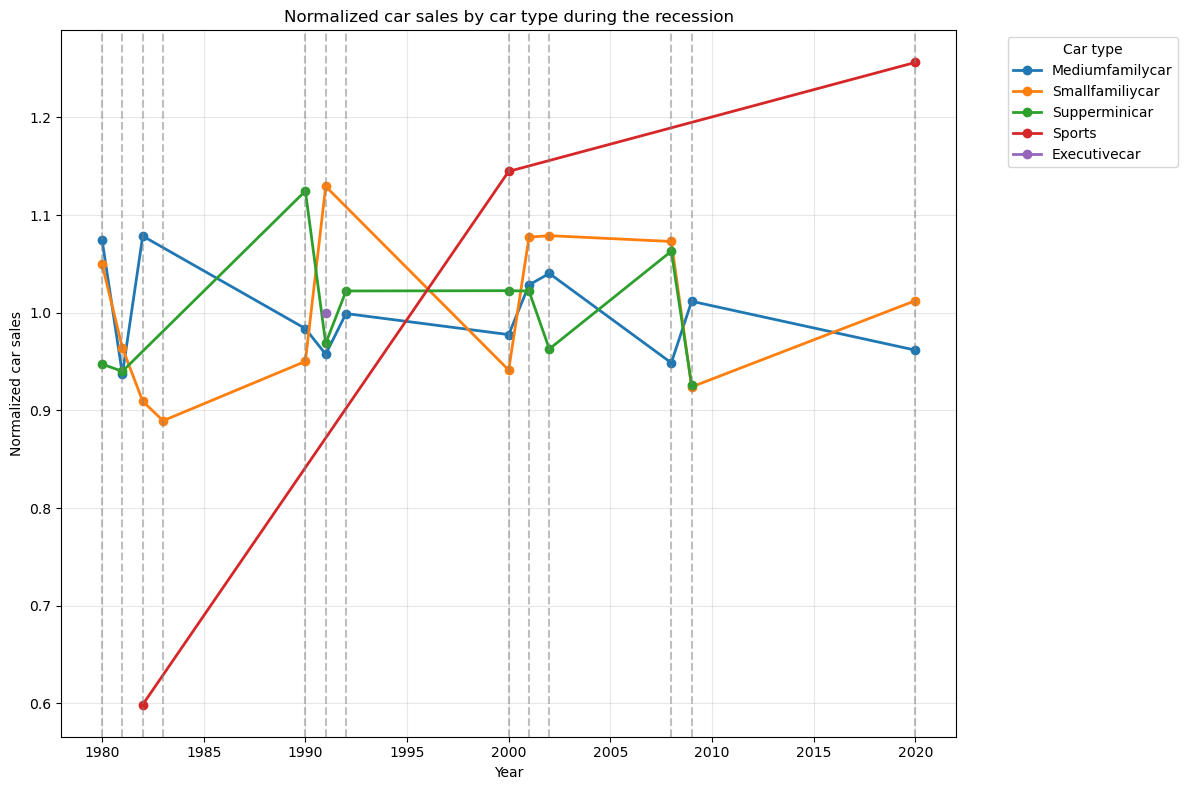

In [40]:
# TASK 1.2: Car type別販売トレンドの比較（Recession Periodのみ）
# Recession Periodのデータを抽出
df_rec = df[df['Recession'] == 1]

# YearとCar type別のaverage salesを計算
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# 各Car typeのaverage salesで正規化
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Yearをインデックスに設定
df_Mline.set_index('Year', inplace=True)

# 各Car typeのプロットを作成
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o', linewidth=2)

# RecessionYearの縦線を追加
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

# ラベルとタイトルの設定
plt.legend(title="Car type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized car sales")
plt.xlabel("Year")
plt.title("Normalized car sales by car type during the recession")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

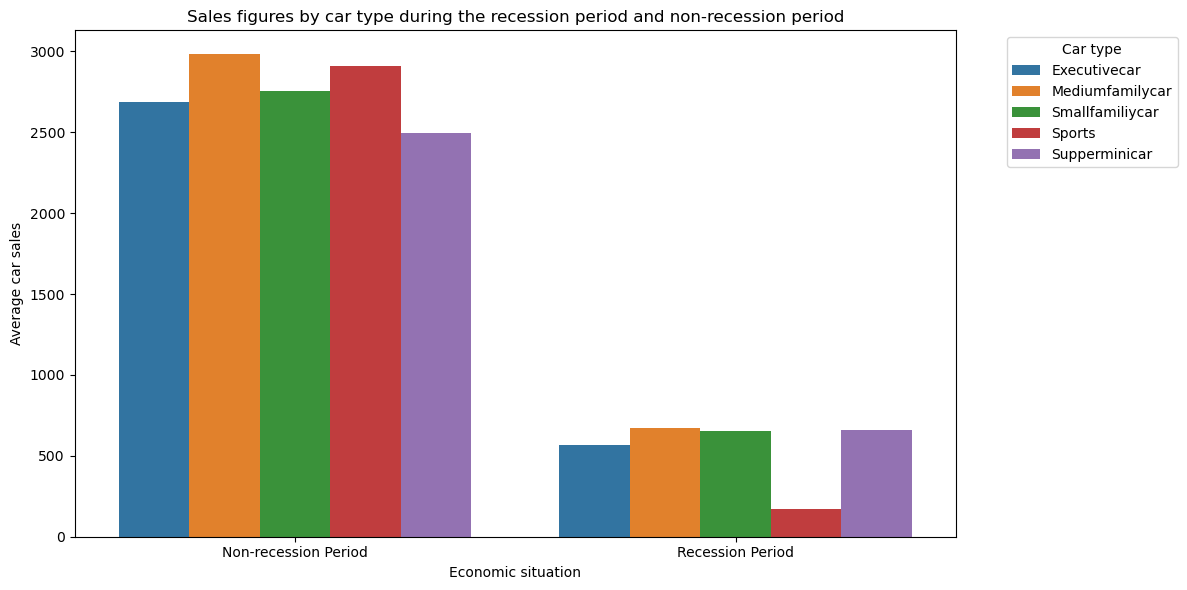

In [41]:
# TASK 1.3: Seabornを使用したRecession PeriodとNon-recession Periodの比較
plt.figure(figsize=(12, 6))

# Car type別のRecession PeriodとNon-recession Periodのaverage salesを計算
grouped_df = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Seabornを使用したグループ化された棒グラフを作成
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=grouped_df)

plt.xticks(ticks=[0, 1], labels=['Non-recession Period', 'Recession Period'])
plt.xlabel('Economic situation')
plt.ylabel('Average car sales')
plt.title('Sales figures by car type during the recession period and non-recession period')

plt.legend(title="Car type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

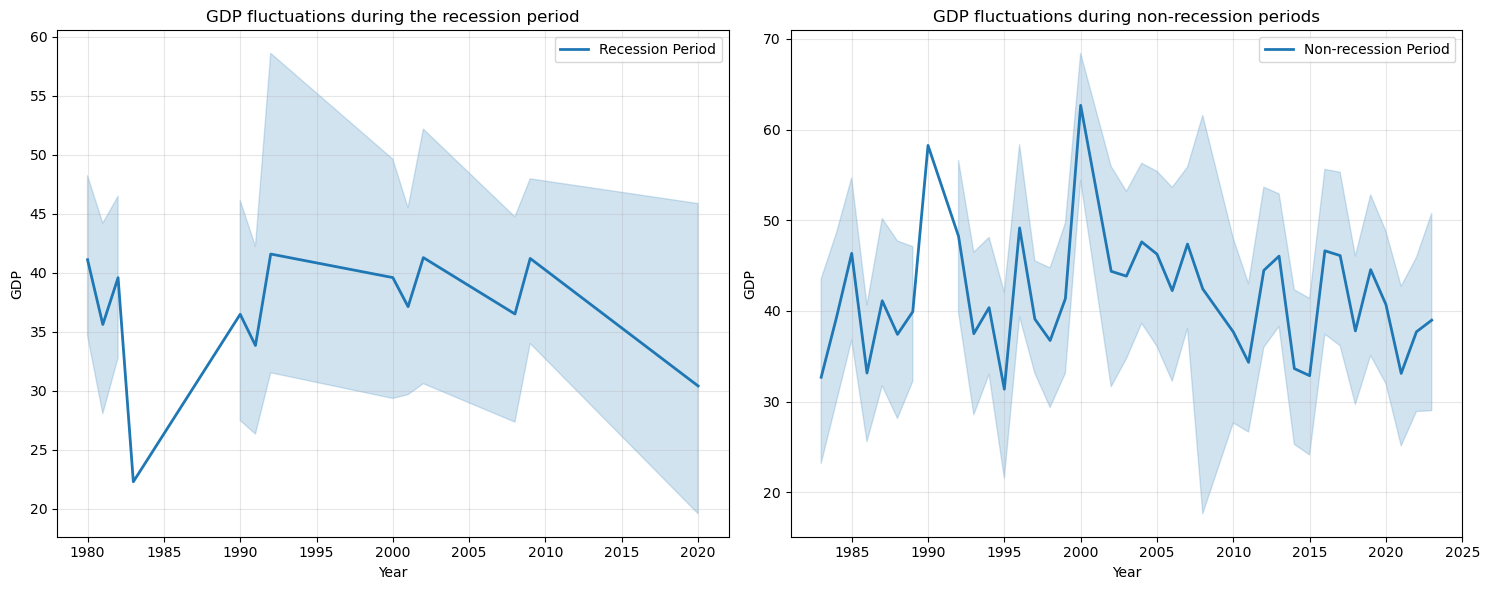

In [42]:
# TASK 1.4: サブプロットを使用したGDP変動の比較
# Recession PeriodとNon-recession Periodのデータを分離
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# 図の作成
fig = plt.figure(figsize=(15, 6))

# サブプロット1: Recession PeriodのGDP変動
ax0 = fig.add_subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession Period', ax=ax0, linewidth=2)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP fluctuations during the recession period')
ax0.grid(True, alpha=0.3)

# サブプロット2: Non-recession PeriodのGDP変動
ax1 = fig.add_subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-recession Period', ax=ax1, linewidth=2)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP fluctuations during non-recession periods')
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

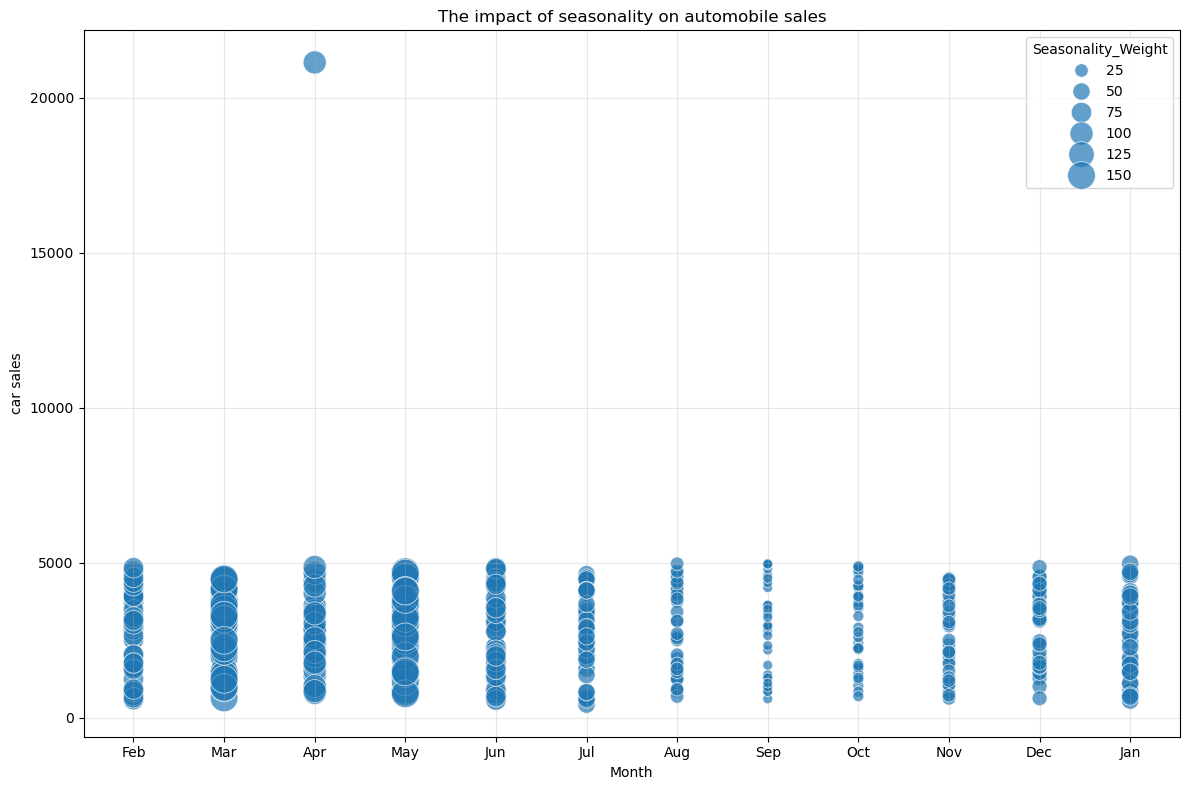

In [43]:
# TASK 1.5: 季節性の影響を示すバブルプロット
# Non-recession Periodのデータを抽出
non_rec_data = df[df['Recession'] == 0]

# バブルサイズを設定
size = non_rec_data['Seasonality_Weight'] * 100

plt.figure(figsize=(12, 8))
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', 
                size=size, sizes=(50, 400), alpha=0.7)

plt.xlabel('Month')
plt.ylabel('car sales')
plt.title('The impact of seasonality on automobile sales')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

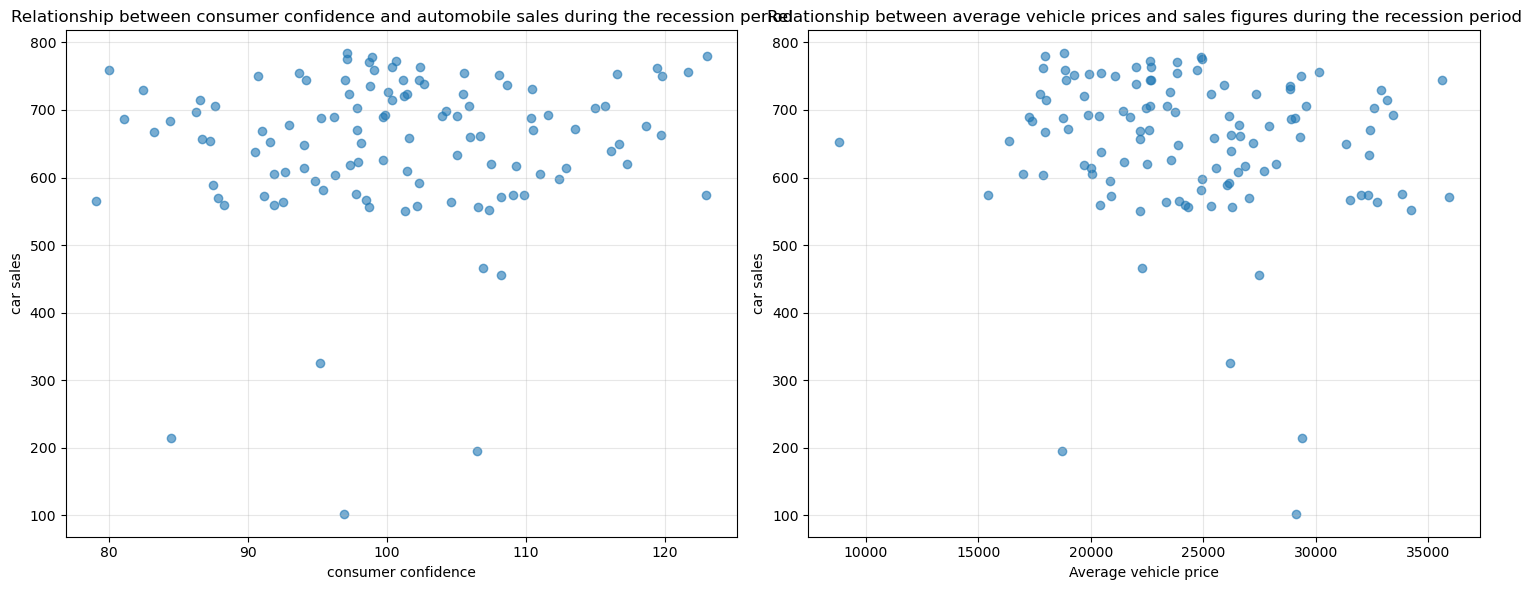

In [44]:
# TASK 1.6: 散布図による相関分析
# Recession Periodのデータを抽出
rec_data = df[df['Recession'] == 1]

# 図の作成
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 消費者信頼度と自動車販売の相関
ax1.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'], alpha=0.6)
ax1.set_xlabel('consumer confidence')
ax1.set_ylabel('car sales')
ax1.set_title('Relationship between consumer confidence and automobile sales during the recession period')
ax1.grid(True, alpha=0.3)

# Average 車両価格と自動車販売の相関
ax2.scatter(rec_data['Price'], rec_data['Automobile_Sales'], alpha=0.6)
ax2.set_xlabel('Average vehicle price')
ax2.set_ylabel('car sales')
ax2.set_title('Relationship between average vehicle prices and sales figures during the recession period')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

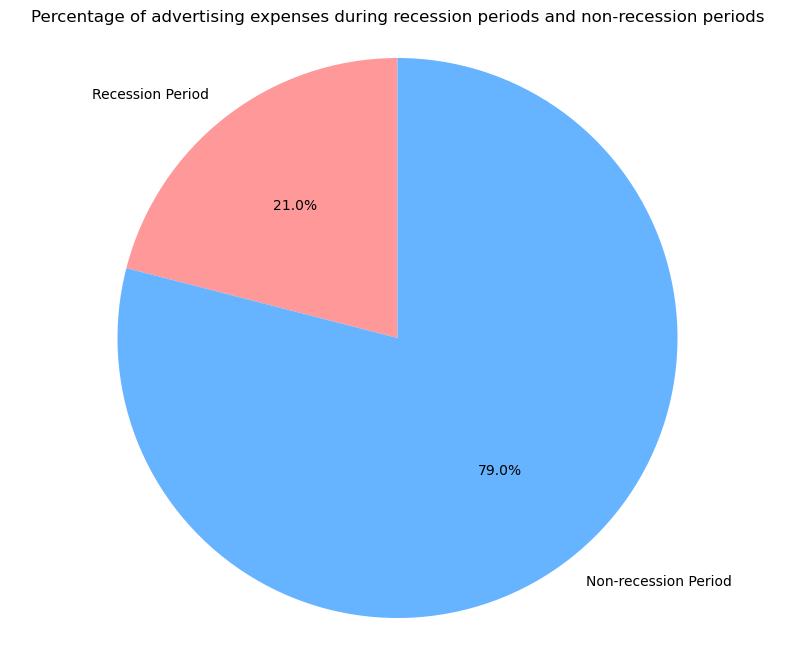

In [45]:
# TASK 1.7: 広告費の円グラフ（Recession Period vs Non-recession Period）
# Recession PeriodとNon-recession Periodのデータを分離
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# 各Periodの総広告費を計算
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# 円グラフを作成
plt.figure(figsize=(10, 8))
labels = ['Recession Period', 'Non-recession Period']
sizes = [RAtotal, NRAtotal]
colors = ['#ff9999', '#66b3ff']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of advertising expenses during recession periods and non-recession periods')

plt.axis('equal')
plt.show()

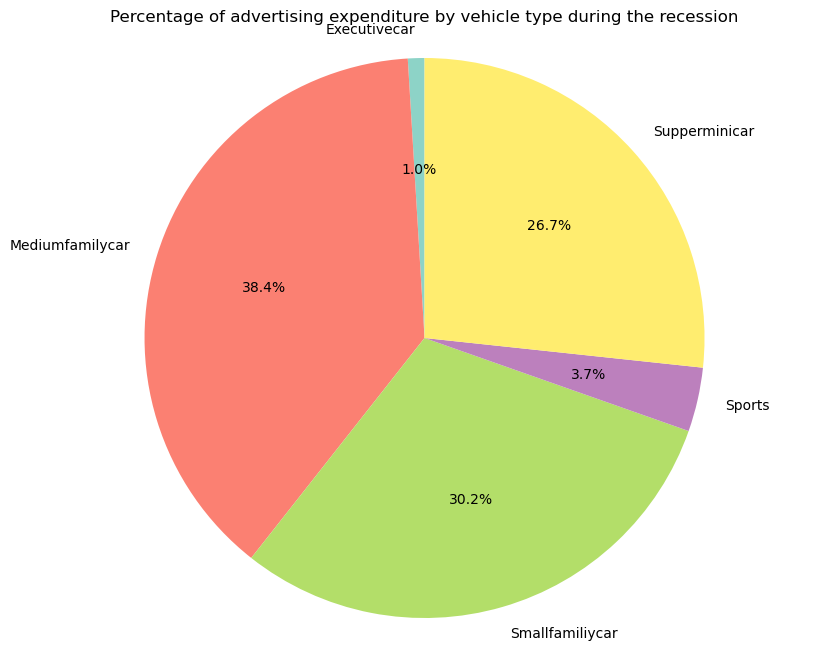

In [46]:
# TASK 1.8: Recession PeriodにおけるCar type別広告費の円グラフ
# Recession Periodのデータを抽出
Rdata = df[df['Recession'] == 1]

# Car type別の総広告費を計算
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# 円グラフを作成
plt.figure(figsize=(10, 8))
labels = VTexpenditure.index
sizes = VTexpenditure.values
colors = plt.cm.Set3(np.linspace(0, 1, len(labels)))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of advertising expenditure by vehicle type during the recession')

plt.axis('equal')
plt.show()

In [47]:
# データの構造を確認
print("データフレームのカラム名:")
print(df.columns.tolist())
print("\nデータの最初の5行:")
print(df.head())
print("\nデータの基本情報:")
print(df.info())

データフレームのカラム名:
['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence', 'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition', 'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales', 'Vehicle_Type', 'City']

データの最初の5行:
        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137         

C:\Users\Mi PC\AppData\Local\Temp\ipykernel_12872\1210290697.py:6: UserWarning:


The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.



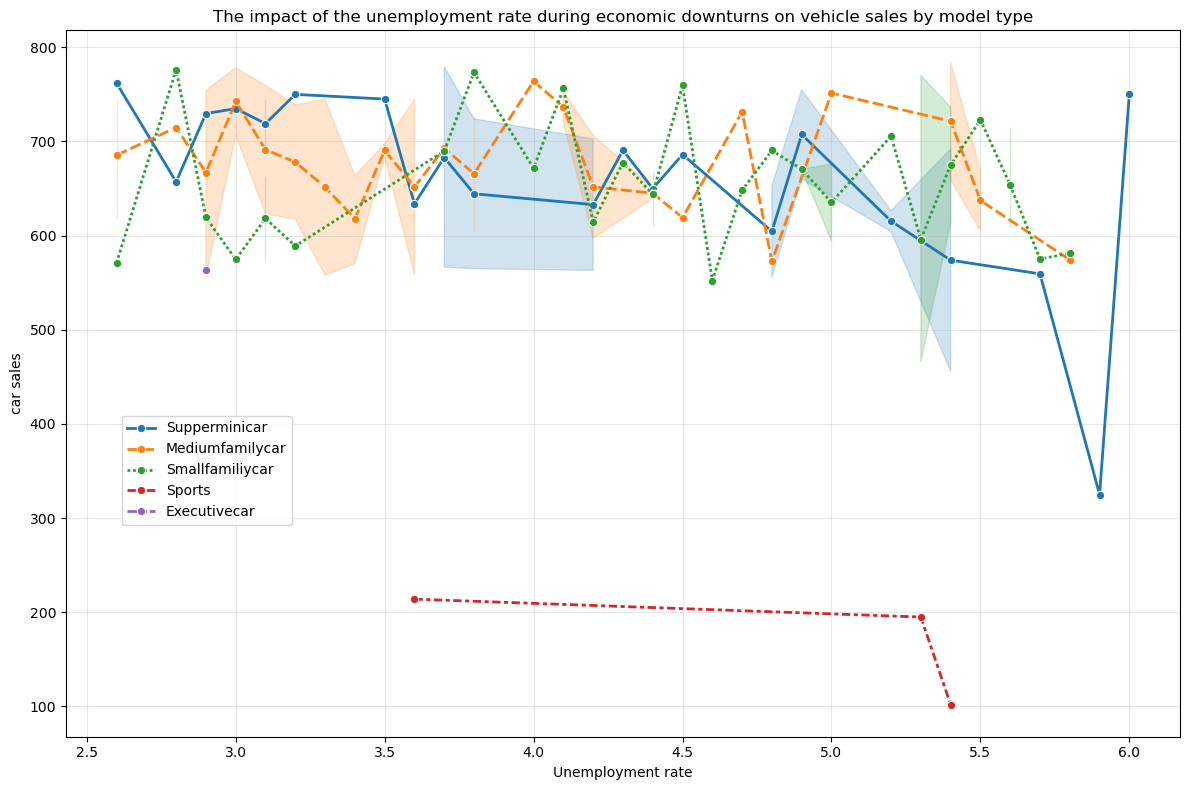

In [48]:
# TASK 1.9: Unemployment rateがCar type別販売に与える影響（修正版）
# Recession Periodのデータを抽出
df_rec = df[df['Recession'] == 1]

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', linewidth=2)

plt.xlabel('Unemployment rate')
plt.ylabel('car sales')
plt.title('The impact of the unemployment rate during economic downturns on vehicle sales by model type')

plt.legend(loc=(0.05, 0.3))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [49]:
pip install dash

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [50]:
# Dashアプリケーションの作成
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Dashアプリケーションの初期化
app = dash.Dash(__name__)

# アプリケーションのレイアウト
app.layout = html.Div([
    # ヘッダー
    html.H1("Automobile Sales Data Analysis Dashboard", 
            style={'textAlign': 'center', 'color': '#2c3e50', 'marginBottom': 30}),
    
    # ドロップダウンのコンテナ
    html.Div([
        html.Div([
            html.Label("Select Period:", style={'fontWeight': 'bold'}),
            dcc.Dropdown(
                id='period-dropdown',
                options=[
                    {'label': 'All Period', 'value': 'all'},
                    {'label': 'recession only', 'value': 'recession'},
                    {'label': 'Only non-recession', 'value': 'non-recession'}
                ],
                value='all',
                style={'width': '100%'}
            )
        ], style={'width': '30%', 'display': 'inline-block', 'marginRight': '20px'}),
        
        html.Div([
            html.Label("Select car type:", style={'fontWeight': 'bold'}),
            dcc.Dropdown(
                id='vehicle-dropdown',
                options=[
                    {'label': 'All car types', 'value': 'all'},
                    {'label': 'Superminicar', 'value': 'Superminicar'},
                    {'label': 'Smallfamilycar', 'value': 'Smallfamilycar'},
                    {'label': 'Mediumfamilycar', 'value': 'Mediumfamilycar'},
                    {'label': 'Executivecar', 'value': 'Executivecar'},
                    {'label': 'Sports', 'value': 'Sports'}
                ],
                value='all',
                style={'width': '100%'}
            )
        ], style={'width': '30%', 'display': 'inline-block', 'marginRight': '20px'}),
        
        html.Div([
            html.Label("Graph type:", style={'fontWeight': 'bold'}),
            dcc.Dropdown(
                id='chart-type-dropdown',
                options=[
                    {'label': 'line graph', 'value': 'line'},
                    {'label': 'bar graph', 'value': 'bar'},
                    {'label': 'Scatter plot', 'value': 'scatter'},
                    {'label': 'Pie chart', 'value': 'pie'}
                ],
                value='line',
                style={'width': '100%'}
            )
        ], style={'width': '30%', 'display': 'inline-block'})
    ], style={'marginBottom': 30}),
    
    # 出力表示エリア
    html.Div(id='output-container', className='output-container'),
    
    # グラフエリア
    html.Div([
        dcc.Graph(id='main-chart'),
        dcc.Graph(id='secondary-chart')
    ])
], style={'padding': '20px', 'backgroundColor': '#f8f9fa'})

# コールバック関数
@app.callback(
    [Output('main-chart', 'figure'),
     Output('secondary-chart', 'figure')],
    [Input('period-dropdown', 'value'),
     Input('vehicle-dropdown', 'value'),
     Input('chart-type-dropdown', 'value')]
)
def update_charts(period, vehicle, chart_type):
    # データのフィルタリング
    if period == 'recession':
        filtered_df = df[df['Recession'] == 1]
    elif period == 'non-recession':
        filtered_df = df[df['Recession'] == 0]
    else:
        filtered_df = df
    
    if vehicle != 'all':
        filtered_df = filtered_df[filtered_df['Vehicle_Type'] == vehicle]
    
    # メイングラフの作成
    if chart_type == 'line':
        # 年別販売数の推移
        yearly_sales = filtered_df.groupby('Year')['Automobile_Sales'].mean().reset_index()
        main_fig = px.line(yearly_sales, x='Year', y='Automobile_Sales',
                          title='Trends in annual automobile sales',
                          labels={'Automobile_Sales': 'average sales', 'Year': '年'})
        main_fig.update_layout(template='plotly_white')
        
    elif chart_type == 'bar':
        # 車種別販売数
        vehicle_sales = filtered_df.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        main_fig = px.bar(vehicle_sales, x='Vehicle_Type', y='Automobile_Sales',
                         title='Average sales by vehicle type',
                         labels={'Automobile_Sales': 'average sales', 'Vehicle_Type': 'Car types'})
        main_fig.update_layout(template='plotly_white')
        
    elif chart_type == 'scatter':
        # GDPと販売数の関係
        main_fig = px.scatter(filtered_df, x='GDP', y='Automobile_Sales', 
                             color='Vehicle_Type',
                             title='Relationship between GDP and automobile sales',
                             labels={'GDP': 'GDP', 'Automobile_Sales': 'Sales volume'})
        main_fig.update_layout(template='plotly_white')
        
    else:  # pie chart
        # 車種別販売数の割合
        vehicle_sales = filtered_df.groupby('Vehicle_Type')['Automobile_Sales'].sum()
        main_fig = px.pie(values=vehicle_sales.values, names=vehicle_sales.index,
                         title='Percentage of sales by vehicle type')
        main_fig.update_layout(template='plotly_white')
    
    # セカンダリグラフの作成（不況期 vs 非不況期の比較）
    recession_comparison = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
    recession_comparison['Period'] = recession_comparison['Recession'].map({0: 'non-recession period', 1: 'recession'})
    
    secondary_fig = px.bar(recession_comparison, x='Period', y='Automobile_Sales',
                          title='Comparison of sales figures during periods of recession and non-recession',
                          labels={'Automobile_Sales': 'average sales', 'Period': 'Period'})
    secondary_fig.update_layout(template='plotly_white')
    
    return main_fig, secondary_fig

# アプリケーションの実行
if __name__ == '__main__':
    app.run(debug=True, port=8050)